Statistics and data preprocessing\
what is,how many, what are those\
Normal distribution is also called to be Gaussian Distribtuion\

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=sns.load_dataset('tips')

In [57]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Data Challenges

Duplicate data\
we don't handle duplicate data, simply we will delete\
Missing values\
Either can replace or remove\
replace with mean,median and mode\
Categorical Data\
bcz machine won't understand text,LabelEncoding and OnehotEncoding\
Outliers\
Imbalanced data\
Scaling

## Outliers

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


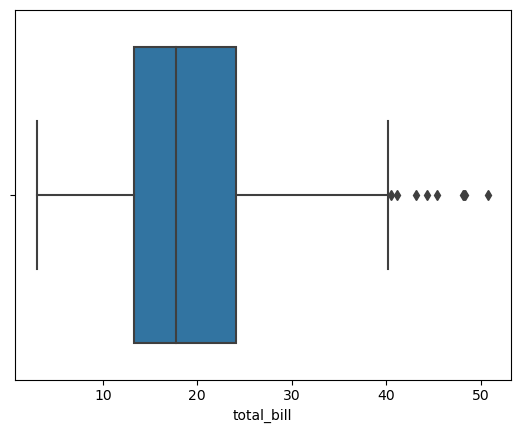

In [7]:
sns.boxplot(df.total_bill)
plt.show()

![boxplot](https://cdn1.byjus.com/wp-content/uploads/2020/10/Box-Plot-and-Whisker-Plot-1.png)

Two ways\
Boxplot\
The standard Normal distribution.\
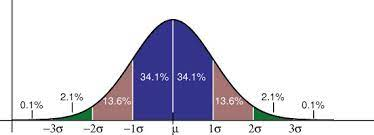

In [22]:
quant=df.total_bill.quantile(q=[0.75,0.25])
quant

0.75    24.1275
0.25    13.3475
Name: total_bill, dtype: float64

In [12]:
Q3=quant.loc[0.75]
Q3

24.127499999999998

In [14]:
Q1=quant.loc[0.25]
Q1

13.3475

In [15]:
IQR=Q3-Q1
IQR

10.779999999999998

In [16]:
maxwhisker=Q3 + 1.5 * IQR
maxwhisker

40.29749999999999

In [17]:
minwhisker=Q1-1.5*IQR
minwhisker

-2.8224999999999945

In [19]:
df.total_bill

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 244, dtype: float64

In [20]:
df['total_bill']=np.where(df.total_bill>40.29749999999999,40.29749999999999,df.total_bill)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_bill'>

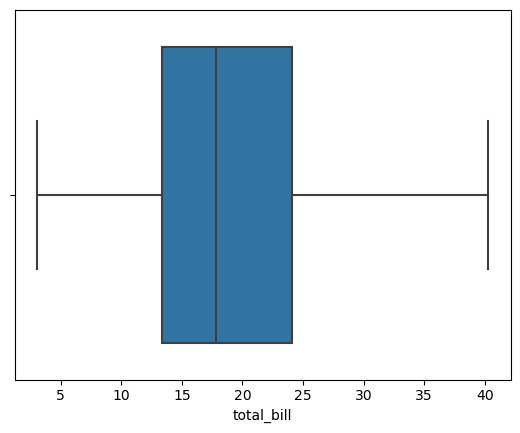

In [21]:
sns.boxplot(df['total_bill'])

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


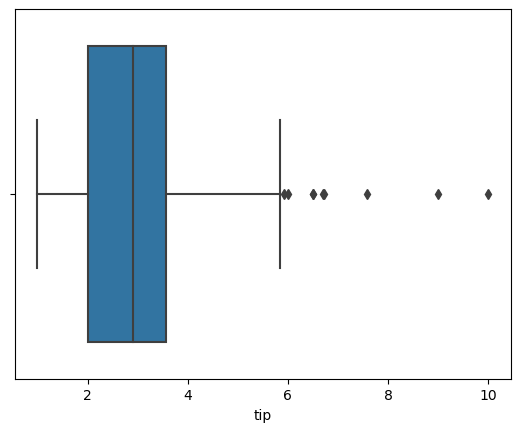

In [24]:
sns.boxplot(df.tip)
plt.show()

In [25]:
# upper=mean + 3 std()
# lower=mean - 3 std()

In [27]:
mean=df.tip.mean()
mean

2.9982786885245902

In [28]:
std=df.tip.std()
std

1.3836381890011826

In [29]:
treshold=3*std
treshold

4.150914567003548

In [30]:
upper=mean+treshold
upper

7.149193255528139

In [31]:
lower=mean-treshold
lower

-1.152635878478958

In [33]:
df['tip']=np.where(df.tip>7.149193255528139,7.149193255528139,df.tip)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='tip'>

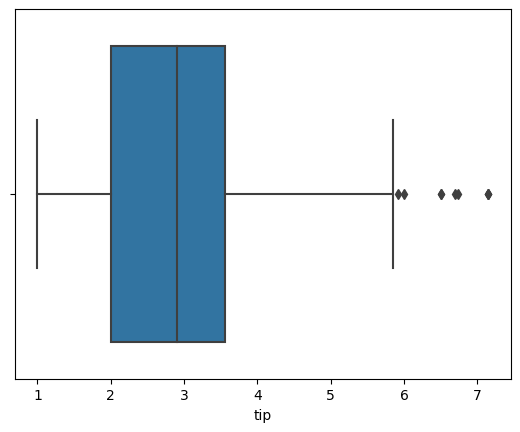

In [34]:
sns.boxplot(df.tip)

In [35]:
df.tip=np.where(df.tip>5.5,5,df.tip)

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


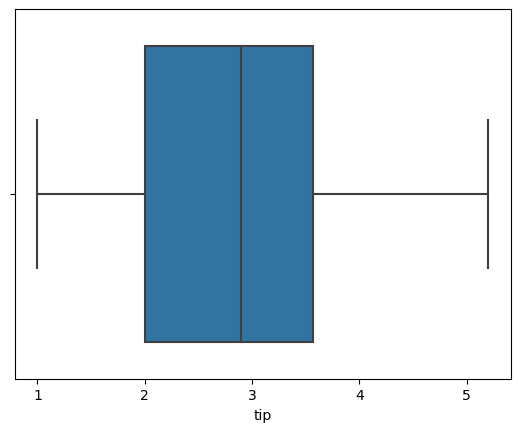

In [37]:
sns.boxplot(df.tip)
plt.show()

## Scaling 

In [38]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 1.Normalization
it will scale all the values into 0 and 1 only\
xi-min()/max - min\
outliers will be effected\
if our column not folllowing normal distribution then we will use normalization\
Trail and Error method
### 2.Standardization
centering the values into mean=0 and standard deviation=1\
values lies in between +ve to -ve\
xi-mean/std\
ouliers less effected comparatively with normalization\
if our column is following normal distribution we will use this standardization\
Trail and Error method
### 3.Robust Scaler
here no outliers will be effected

In [39]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler,RobustScaler

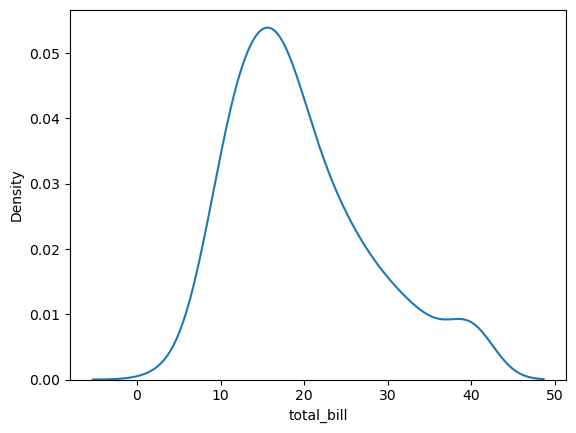

In [42]:
sns.kdeplot(df.total_bill)
plt.show()

In [43]:
df.total_bill.skew()

0.8420311140917469

## QQ Plot

In [44]:
import scipy.stats as ss

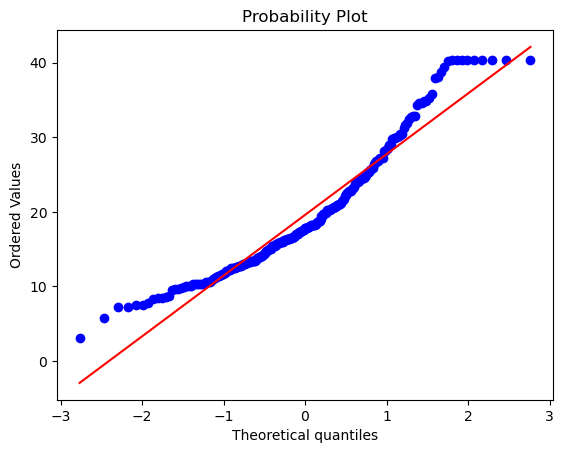

In [45]:
ss.probplot(df.total_bill,dist='norm',plot=plt)
plt.show()

In [74]:
scaler=MinMaxScaler()

In [76]:
df['total_bill']=scaler.fit_transform(df[['total_bill']])

In [77]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,0.291579,-1.439947,Female,No,Sun,Dinner,2
1,0.152283,-0.969205,Male,No,Sun,Dinner,3
2,0.375786,0.363356,Male,No,Sun,Dinner,3
3,0.431713,0.225754,Male,No,Sun,Dinner,2
4,0.450775,0.443020,Female,No,Sun,Dinner,4


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
df1=sns.load_dataset('iris')

In [85]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


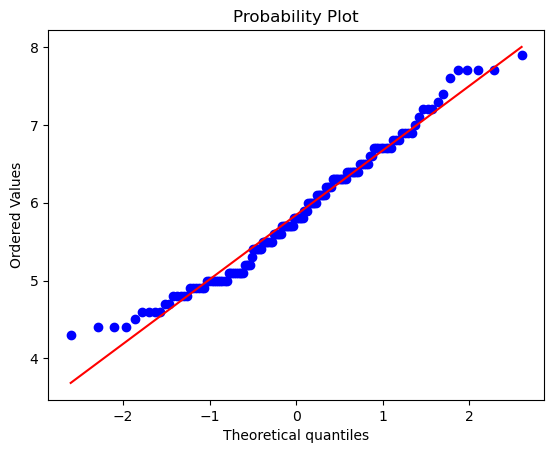

In [86]:
ss.probplot(df1.sepal_length,dist='norm',plot=plt)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sepal_length'>

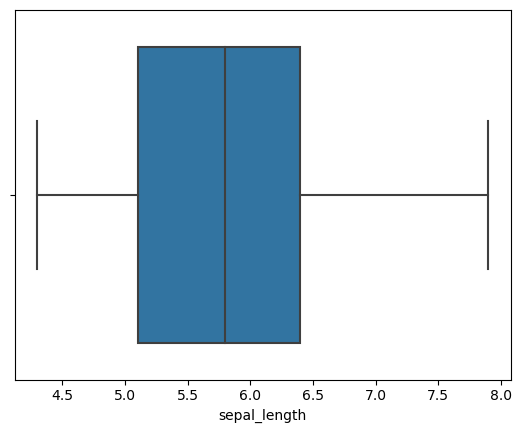

In [88]:
sns.boxplot(df1.sepal_length)

In [90]:
scaler1=StandardScaler()

In [94]:
df1['sepal_length']=scaler1.fit_transform(df1[['sepal_length']])

In [95]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,3.5,1.4,0.2,setosa
1,-1.143017,3.0,1.4,0.2,setosa
2,-1.385353,3.2,1.3,0.2,setosa
3,-1.506521,3.1,1.5,0.2,setosa
4,-1.021849,3.6,1.4,0.2,setosa


In [99]:
df1.species.value_counts()# Balanced data

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## Imbalanced Data Handling

In [96]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,0.291579,-1.439947,Female,No,Sun,Dinner,2
1,0.152283,-0.969205,Male,No,Sun,Dinner,3
2,0.375786,0.363356,Male,No,Sun,Dinner,3
3,0.431713,0.225754,Male,No,Sun,Dinner,2
4,0.450775,0.443020,Female,No,Sun,Dinner,4


In [98]:
df.smoker.value_counts()# imbalanced data

No     151
Yes     93
Name: smoker, dtype: int64

If we are having huge difference among the classes then only it is called to be imbalanced data problem\
1.Undersampling\
we decreasing highest to lowest to make them equal\
2.Oversampling\
we are increasing lower to higher to make them equal\
3.SMOTE\
by nearest neibhours\
outliers will be effected\
4.BoarderSMOTE\
it will remove outliers\
5.ADASYN\
it will handle outliers\
it will work based shortest distance too

## Splitting the data

In [100]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,3.5,1.4,0.2,setosa
1,-1.143017,3.0,1.4,0.2,setosa
2,-1.385353,3.2,1.3,0.2,setosa
3,-1.506521,3.1,1.5,0.2,setosa
4,-1.021849,3.6,1.4,0.2,setosa


In [5]:
x=df1.drop('species',axis=1)
y=df1[['species']]

## Train test split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,stratify=y,random_state=5,train_size=0.8)

In [8]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
48,5.3,3.7,1.5,0.2
40,5.0,3.5,1.3,0.3
45,4.8,3.0,1.4,0.3
56,6.3,3.3,4.7,1.6
128,6.4,2.8,5.6,2.1
...,...,...,...,...
99,5.7,2.8,4.1,1.3
97,6.2,2.9,4.3,1.3
41,4.5,2.3,1.3,0.3
32,5.2,4.1,1.5,0.1
